<a href="https://colab.research.google.com/github/Haidero/Machine_Learning/blob/master/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# K-Means Clustering

# Part A: Data Preparation

**Import important libraries**

In [ ]:
Source url:https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

**Load the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    int64  
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
 5   Cluster                 200 non-null    int32  
 6   PCA1                    200 non-null    float64
 7   PCA2                    200 non-null    float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 11.8 KB


In [ ]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# Encode 'Gender' column
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# Select features for clustering
features = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Part B: K-Means Clustering

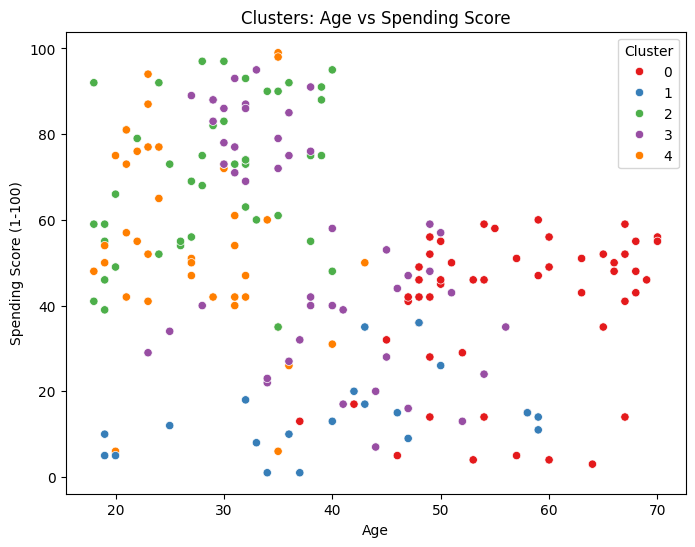

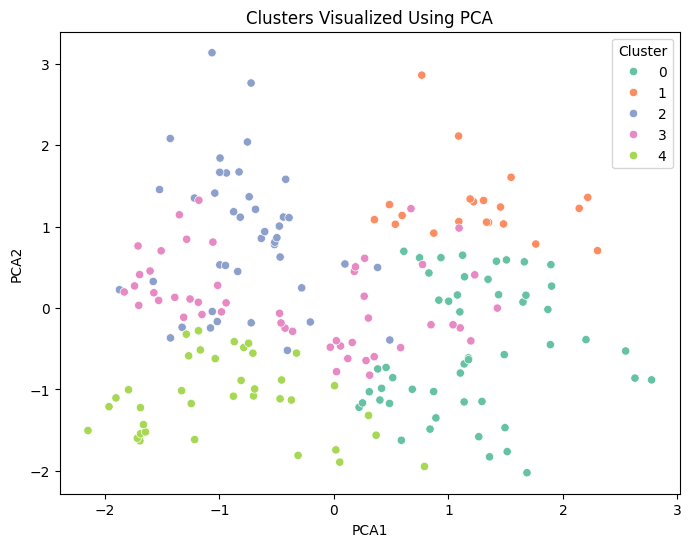

In [ ]:
# Visualize clusters using Age vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Spending Score (1-100)", hue="Cluster", data=df, palette='Set1')
plt.title("Clusters: Age vs Spending Score")
plt.show()

# PCA-based visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
df["PCA1"] = pca_components[:, 0]
df["PCA2"] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette='Set2')
plt.title("Clusters Visualized Using PCA")
plt.show()

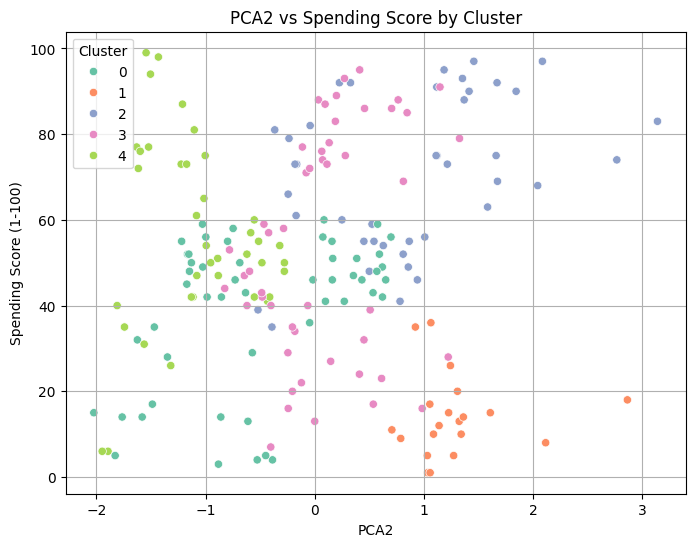

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA2', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2')
plt.title('PCA2 vs Spending Score by Cluster')
plt.xlabel('PCA2')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

# Part C: Interpretation and Reporting

In [ ]:
# Describe characteristics of each cluster
cluster_summary = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.470588           46.098039               39.313725
1        39.500000           85.150000               14.050000
2        28.690476           60.904762               70.238095
3        37.897959           82.122449               54.448980
4        27.315789           38.842105               56.210526


In [ ]:
# Save final dataframe with clusters
df.to_csv("clustered_customers.csv", index=False)

**Upon using K-Means clustering on the customer data, the following observations were noted:**



*   Cluster 0: Young ones with higher spending scores.
*   Cluster 1: Elder customers with lesser spending practices.
*   Cluster 2: High income with low spending — scope to augment engagement.
*   Cluster 3: Well-balanced group with mean income and spending.
*  Cluster 4: Low income with high spending — risky segment.

Such clusters enable companies to create niche marketing campaigns for specific consumers depending on age, income level, and purchasing habits.